# Kaggle LEARN 사용자를 위한 주택 가격경쟁!
- Link [https://www.kaggle.com/c/home-data-for-ml-course/data]

In [1]:
import pandas as pd

train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 데이타 컬럼
|컬럼명|의미|
|---|---|
|MSSubClass|EDA 탐색데이터|

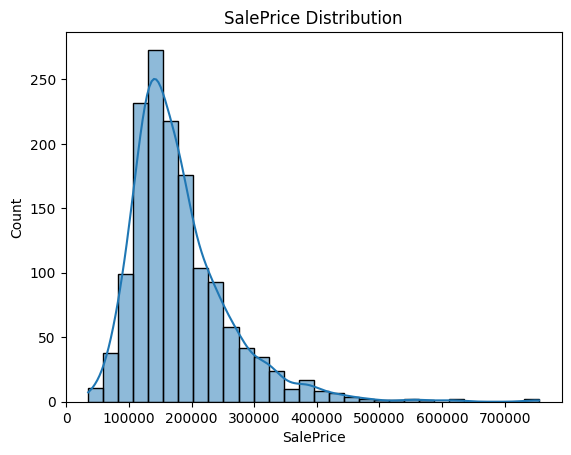

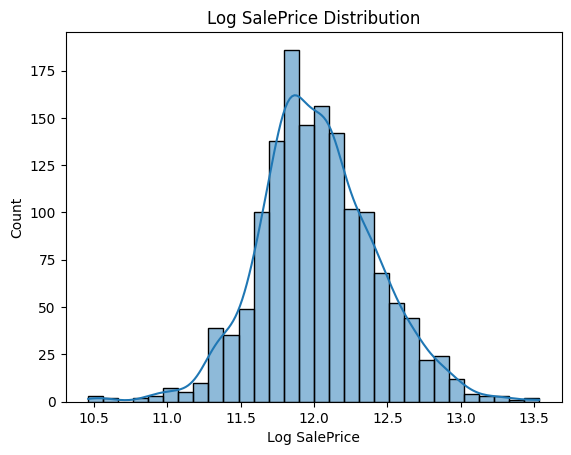

Series([], dtype: int64)
변환된 데이터 형태: (1460, 261)
RMSE: 0.17368274733869113
Random Forest RMSE: 0.146248348684588
XGBoost RMSE: 0.13184945342590035
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3170
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 169
[LightGBM] [Info] Start training from score 12.030658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


train_data = train
test_data = test

sns.histplot(train_data["SalePrice"], kde=True, bins=30)
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.title("SalePrice Distribution")
plt.show()

sns.histplot(np.log1p(train_data["SalePrice"]), kde=True, bins=30)
plt.xlabel("Log SalePrice")
plt.ylabel("Count")
plt.title("Log SalePrice Distribution")
plt.show()

missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

num_features = train_data.select_dtypes(include=[np.number]).columns
train_data[num_features] = train_data[num_features].fillna(train_data[num_features].median())

# 범주형 변수의 결측값을 "None"으로 채움
cat_features = train_data.select_dtypes(include=[object]).columns
train_data[cat_features] = train_data[cat_features].fillna("None")

# ID 컬럼 삭제
train_data = train_data.drop(columns=["Id"])

# 범주형 변수 One-Hot Encoding
train_data = pd.get_dummies(train_data, drop_first=True)
print("변환된 데이터 형태:", train_data.shape)

from sklearn.model_selection import train_test_split

X = train_data.drop(columns=["SalePrice"])
y = np.log1p(train_data["SalePrice"])  # 로그 변환 적용

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 모델 선언 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("RMSE:", rmse)


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 랜덤 포레스트 모델 선언
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_model.predict(X_valid)
rmse_rf = np.sqrt(mean_squared_error(y_valid, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)

import xgboost as xgb

# XGBoost 모델 선언
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_xgb = xgb_model.predict(X_valid)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)

import lightgbm as lgb

# LightGBM 모델 선언
lgb_model = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)

# 모델 학습
lgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_lgb = lgb_model.predict(X_valid)
rmse_lgb = np.sqrt(mean_squared_error(y_valid, y_pred_lgb))
print("LightGBM RMSE:", rmse_lgb)

print(f"Linear Regression RMSE: {rmse}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"LightGBM RMSE: {rmse_lgb}")


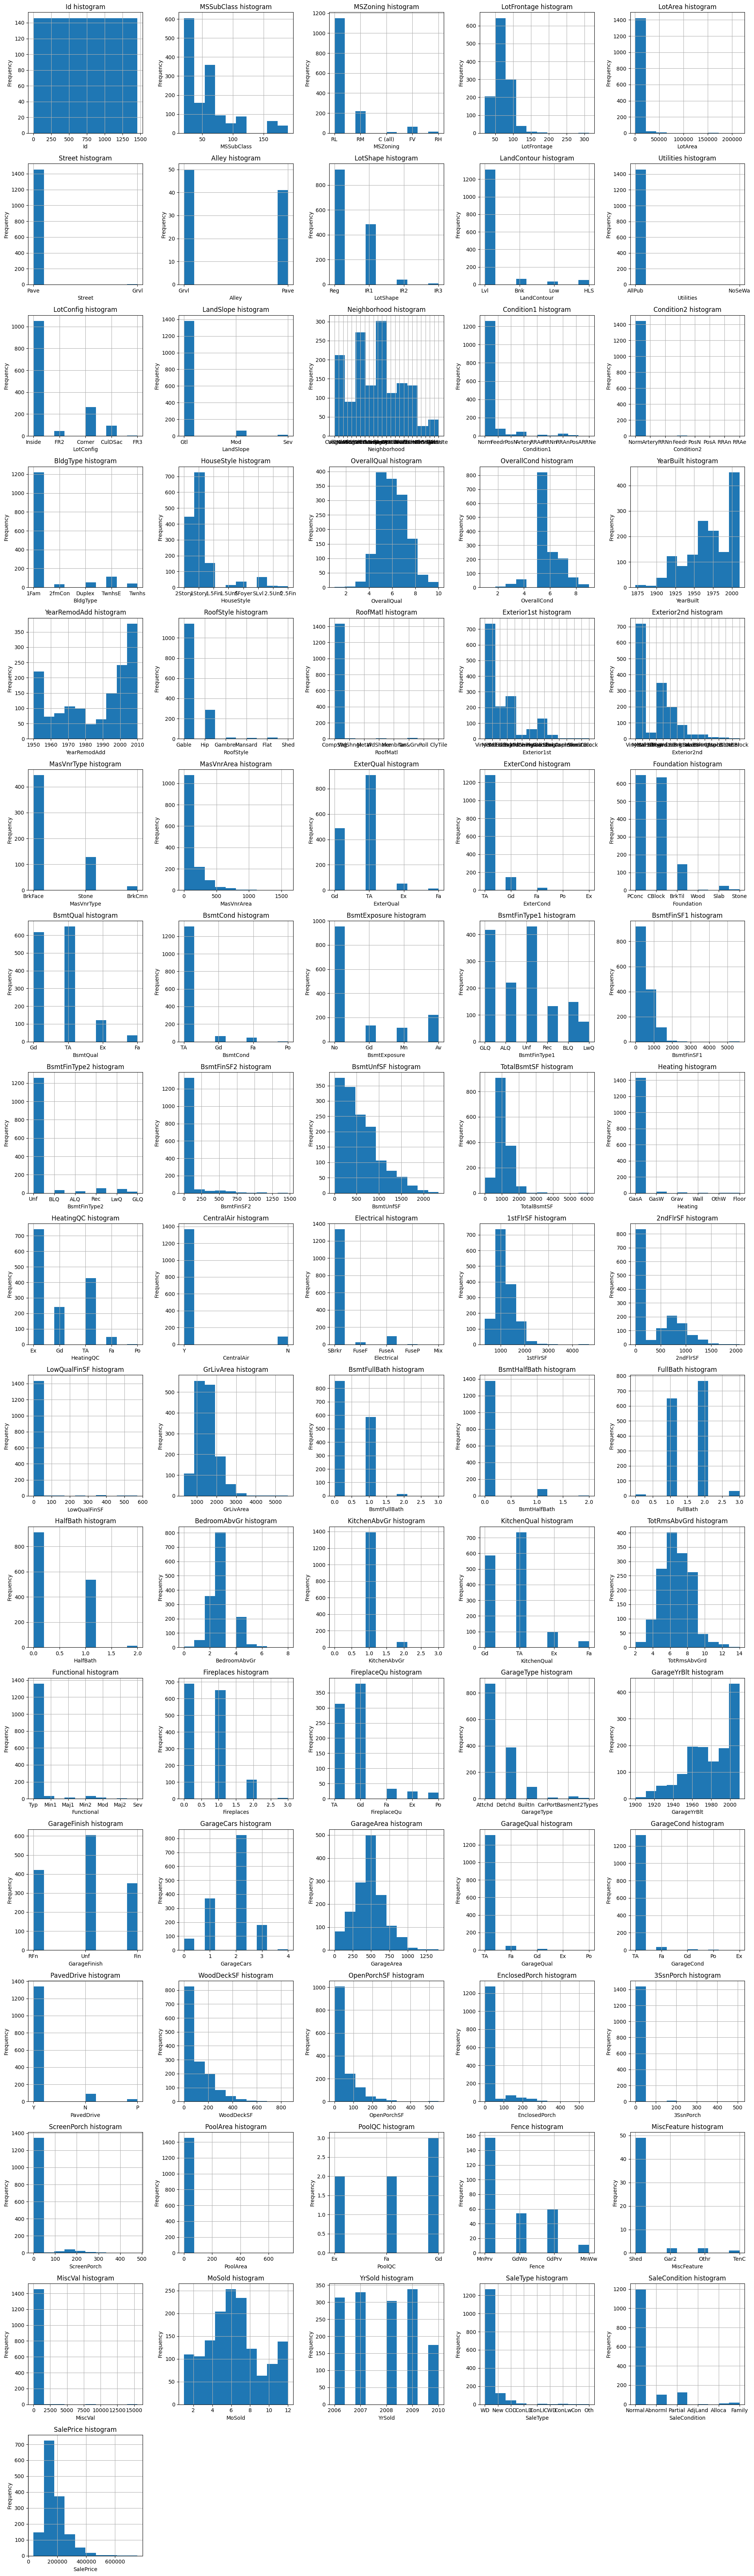

In [29]:
# 데이터를 분석하자!
import matplotlib.pyplot as plt

num_plots = len(train.columns)
cols_per_row = 5
rows = -(-num_plots // cols_per_row)  # 올림 연산으로 자동 조정
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 4))

for i, col in enumerate(train.columns):
    row, col_idx = divmod(i, cols_per_row)
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]
    train[col].hist(ax=ax)
    ax.set_title(f"{col} histogram")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    # train[col].hist()

    # ax.scatter(train[col], train['SalePrice'], alpha=0.5)
# plt.xlabel("Sale Price")
# plt.ylabel("Frequency")
# plt.title("Distribution of sale Price")
for j in range(i + 1, rows * cols_per_row):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()
# test['SalePrice'].hist()

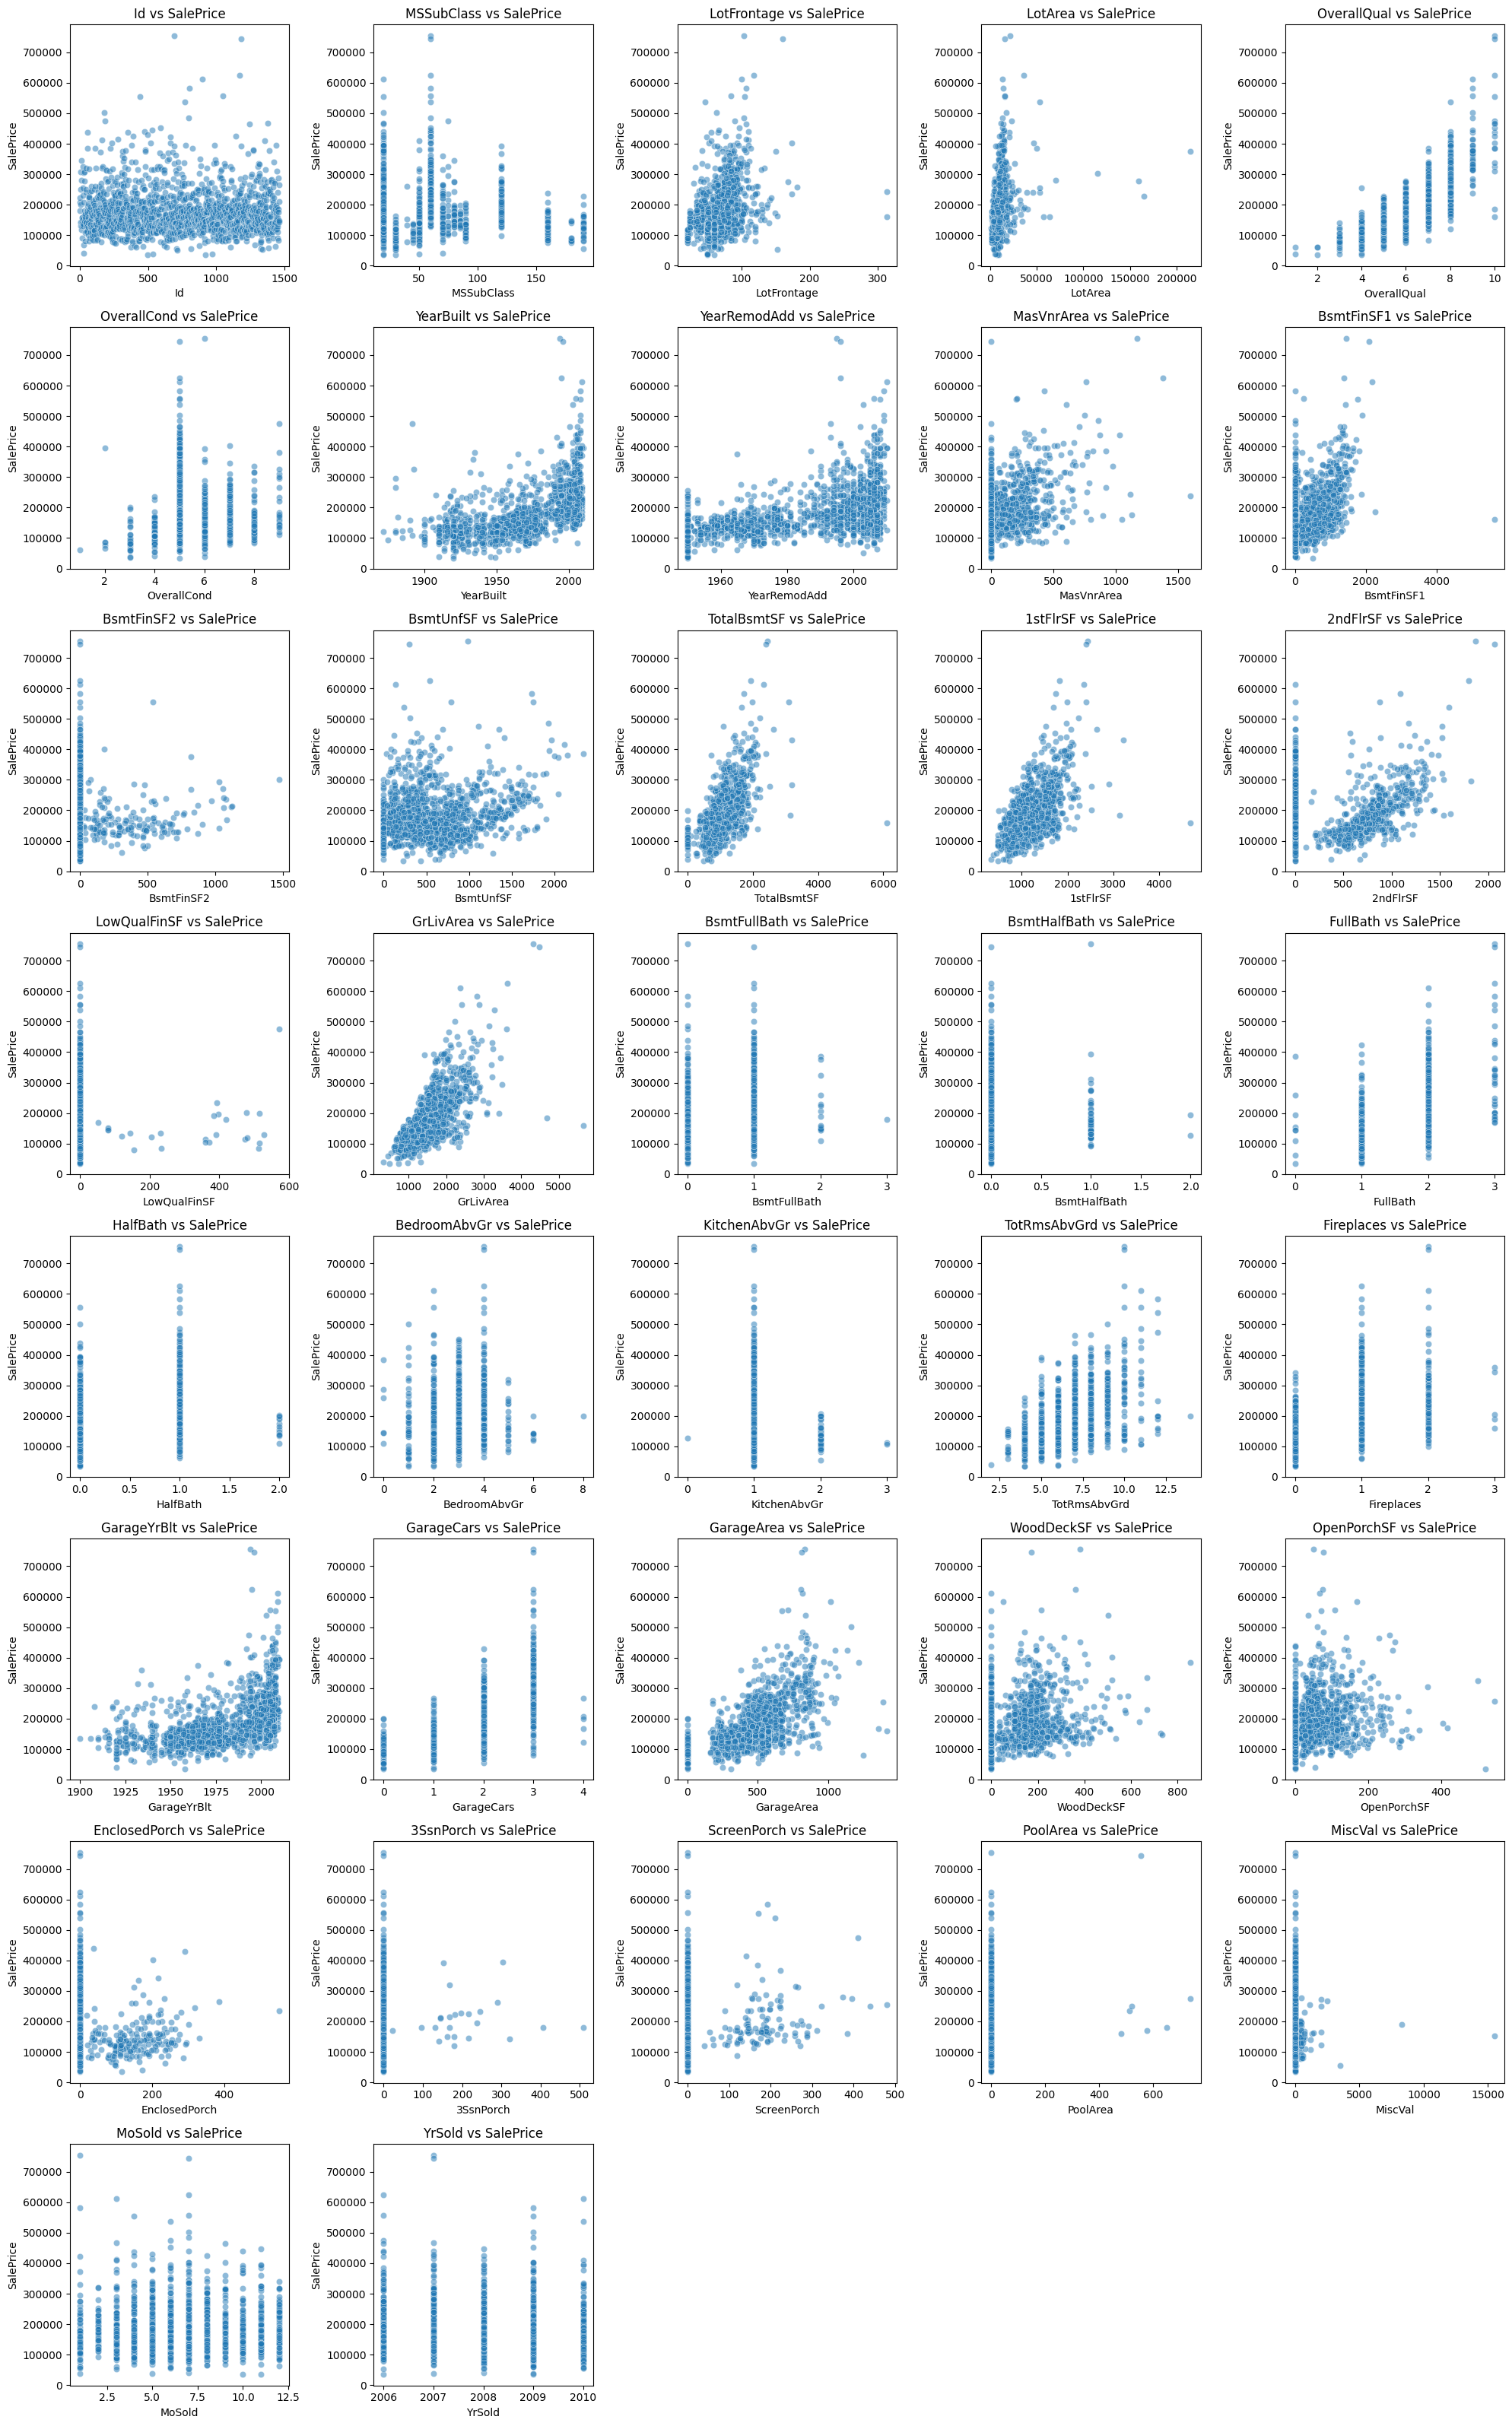

In [4]:
import seaborn as sns

numeric_cols = train.select_dtypes(include=['number']).columns

numeric_cols = [col for col in numeric_cols if col != 'SalePrice']

# 전체 플롯 개수
num_plots = len(numeric_cols)

# 가로 5개, 세로 자동 조정
cols_per_row = 5
rows = -(-num_plots // cols_per_row)  # 올림 연산으로 자동 계산

fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 4))

# 모든 변수에 대해 scatter plot 그리기
for i, col in enumerate(numeric_cols):
    row, col_idx = divmod(i, cols_per_row)
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]  # 1행일 경우 처리
    sns.scatterplot(x=train[col], y=train["SalePrice"], ax=ax, alpha=0.5)
    ax.set_title(f"{col} vs SalePrice")

# 빈 플롯 숨기기
for j in range(i + 1, rows * cols_per_row):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

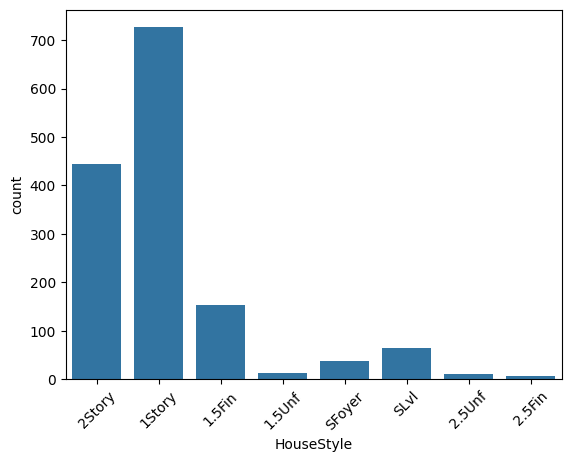

In [6]:
sns.countplot(x=train['HouseStyle'])
plt.xticks(rotation=45)  # 레이블이 많으면 회전해서 보기 좋게
plt.show()



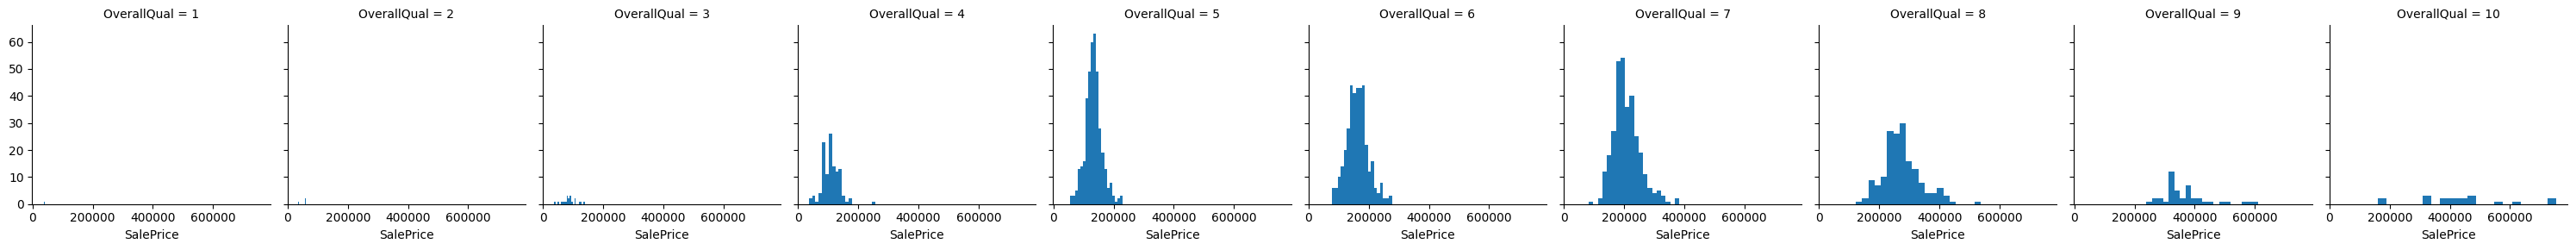

In [7]:
g = sns.FacetGrid(train, col="OverallQual")  # 'OverallQual' 별로 나눠서 그리기
g.map(plt.hist, "SalePrice", bins=20)  # SalePrice의 히스토그램을 각 그룹별로 그림
plt.show()


/tmp/ipykernel_2386/910602106.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['SalePrice'], shade=True)


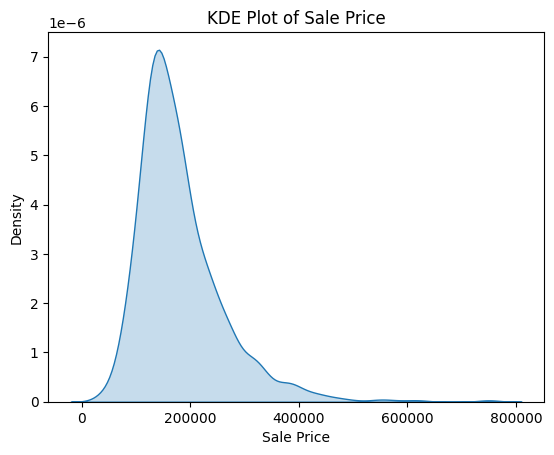

In [8]:
sns.kdeplot(train['SalePrice'], shade=True)
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('KDE Plot of Sale Price')
plt.show()

/tmp/ipykernel_2386/1903534973.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['OverallQual'] == 5]['SalePrice'], label="Qual 5", shade=True)
/tmp/ipykernel_2386/1903534973.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['OverallQual'] == 10]['SalePrice'], label="Qual 10", shade=True)


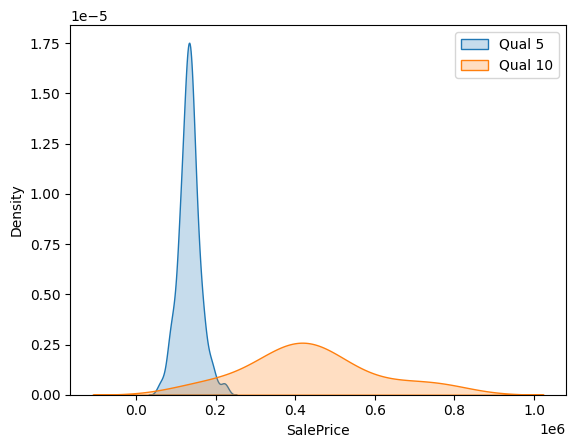

In [9]:
sns.kdeplot(train[train['OverallQual'] == 5]['SalePrice'], label="Qual 5", shade=True)
sns.kdeplot(train[train['OverallQual'] == 10]['SalePrice'], label="Qual 10", shade=True)
plt.legend()
plt.show()


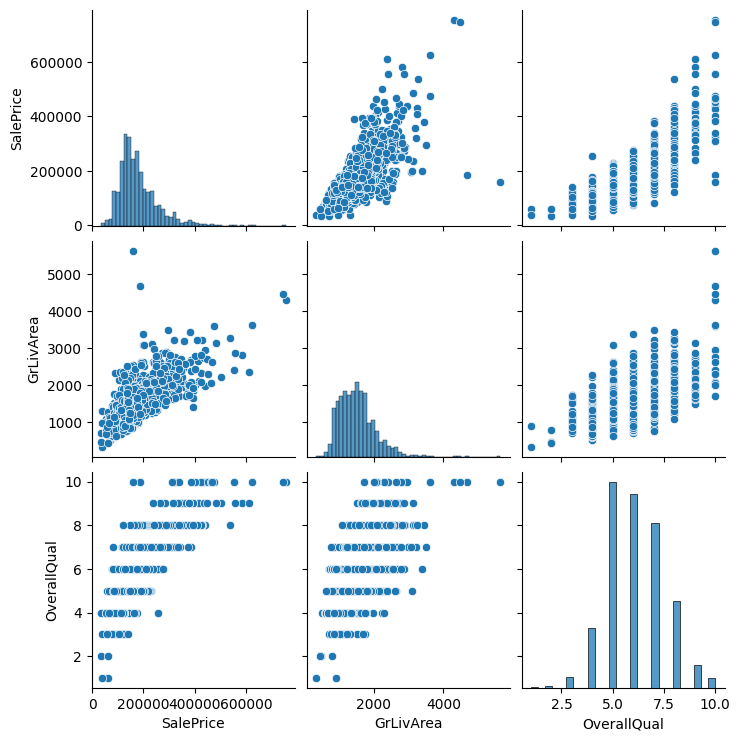

In [10]:
sns.pairplot(train[['SalePrice', 'GrLivArea', 'OverallQual']])
plt.show()


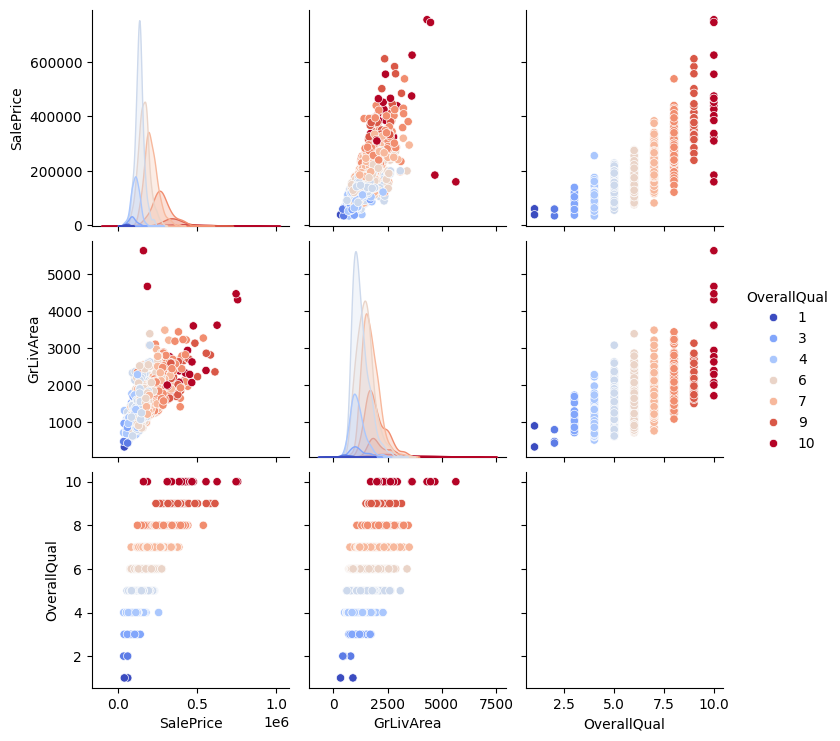

In [11]:
sns.pairplot(train, vars=['SalePrice', 'GrLivArea', 'OverallQual'], hue="OverallQual", palette="coolwarm")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

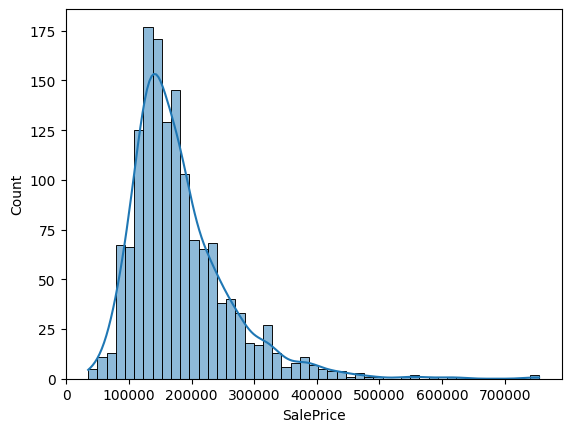

In [12]:
train.info()  # 데이터 타입, Null 값 확인
train.describe()  # 기초 통계 요약
train.isnull().sum()  # 결측치 개수 확인
sns.histplot(train["SalePrice"], kde=True)
plt.show()




In [162]:
from sklearn.model_selection import train_test_split
# print(len(test.columns), len(train.columns))
# pd.DataFrame
# print(train.columns.to_frame())

# train_features = ['YearBuilt',
# 'YearRemodAdd',
# '1stFlrSF',
# '2ndFlrSF',
# 'GrLivArea',
# 'GarageYrBlt',
# 'GarageArea',
# 'WoodDeckSF',
# 'OpenPorchSF',
# ]
# X = train[train_features]
X = train
y = train.SalePrice
# train = train.drop(columns=['SalePrice'])
train_X, val_X, train_y, val_y = train_test_split(X, y)

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


price_model = RandomForestRegressor(random_state=1)
price_model.fit(train_X, train_y)
price_preds = price_model.predict(val_X)
# print(price_preds)
# price_preds = price_model.predict(t)
print(mean_absolute_error(price_preds, val_y))
# final_preds = price_model.predict(test)
#print(final_preds)
# print(test[train_features].tail())


ValueError: could not convert string to float: 'RM'